In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import casadi
import os

## 1 - Manufacturer data

In [2]:
Q_max_table = [[0,-25,-20,-15,-7,-4,-2,2,7,10,15,18,20,35],
      [30,8750,10130,11500,12000,12000,12000,12000,12000,12000,12000,12000,12000,12000],
      [35,8500,10000,11500,12000,12000,12000,12000,12000,12000,12000,12000,12000,12000],
      [40,8250,9880,11500,12000,12000,12000,12000,12000,12000,12000,12000,12000,12000],
      [45,8000,9750,11500,12000,12000,12000,12000,12000,12000,12000,12000,12000,12000],
      [50,9630,9630,11500,12000,12000,12000,12000,12000,12000,12000,12000,12000,12000],
      [55,11500,11500,11500,12000,12000,12000,12000,12000,12000,12000,12000,12000,12000],
      [60,12000,12000,12000,12000,12000,12000,12000,12000,12000,12000,12000,12000,12000],
      [65,12000,12000,12000,12000,12000,12000,12000,12000,12000,12000,12000,12000,12000]]

COP_table = [[0,-25,-20,-15,-7,-4,-2,2,7,10,15,18,20,35],
      [30,2.13,2.34,2.55,3.15,3.36,3.47,3.69,4.93,5.22,5.99,6.29,6.49,7.98],
      [35,1.85,2.13,2.40,3.00,3.17,3.28,3.50,4.60,4.87,5.56,5.84,6.02,7.41],
      [40,1.58,1.91,2.25,2.85,2.97,3.09,3.31,4.27,4.51,5.13,5.39,5.56,6.84],
      [45,1.30,1.70,2.10,2.70,2.78,2.90,3.12,3.93,4.16,4.71,4.94,5.10,6.28],
      [50,1.49,1.49,1.95,2.55,2.59,2.71,2.93,3.60,3.81,4.28,4.49,4.64,5.71],
      [55,1.80,1.80,1.80,2.40,2.39,2.53,2.73,2.80,3.46,3.85,4.05,4.17,5.14],
      [60,2.25,2.25,2.25,2.25,2.20,2.34,2.54,2.60,3.10,3.43,3.60,3.71,4.57],
      [65,2.05,2.05,2.05,2.05,2.05,2.15,2.35,2.60,2.75,3.00,3.15,3.25,4.00]]

# Get the mass flow rate for a given LWT
def m_HP(T):
    if   T<=45: m = 34.5/60
    elif T<=55: m = 21.6/60
    elif T<=65: m = 17.3/60
    return round(m,2)

In [3]:
Q_max = pd.DataFrame(Q_max_table[1:], columns=Q_max_table[0]).T
Q_max.columns = Q_max.iloc[0]
Q_max = Q_max[1:]
print("Maximum Q_HP:")
# SCALING
Q_max = Q_max.multiply(0.6666666)
# SCALING
display(Q_max)

# The minimum heating power is assumed to be 30% of the maximum
Q_min = Q_max * 0.3
Q_min = Q_min.round(1)
print("Minimum Q_HP:")
display(Q_min)

COP = pd.DataFrame(COP_table[1:], columns=COP_table[0]).T
COP.columns = COP.iloc[0]
COP = COP[1:]
print("COP:")
display(COP)

Maximum Q_HP:


,30,35,40,45,50,55,60,65
-25,5833.332750,5666.6661,5499.999450,5333.33280,6419.999358,7666.6659,7999.9992,7999.9992
-20,6753.332658,6666.6660,6586.666008,6499.99935,6419.999358,7666.6659,7999.9992,7999.9992
-15,7666.665900,7666.6659,7666.665900,7666.66590,7666.665900,7666.6659,7999.9992,7999.9992
-7,7999.999200,7999.9992,7999.999200,7999.99920,7999.999200,7999.9992,7999.9992,7999.9992
-4,7999.999200,7999.9992,7999.999200,7999.99920,7999.999200,7999.9992,7999.9992,7999.9992
-2,7999.999200,7999.9992,7999.999200,7999.99920,7999.999200,7999.9992,7999.9992,7999.9992
2,7999.999200,7999.9992,7999.999200,7999.99920,7999.999200,7999.9992,7999.9992,7999.9992
7,7999.999200,7999.9992,7999.999200,7999.99920,7999.999200,7999.9992,7999.9992,7999.9992
10,7999.999200,7999.9992,7999.999200,7999.99920,7999.999200,7999.9992,7999.9992,7999.9992
15,7999.999200,7999.9992,7999.999200,7999.99920,7999.999200,7999.9992,7999.9992,7999.9992


Minimum Q_HP:


,30,35,40,45,50,55,60,65
-25,1750.0,1700.0,1650.0,1600.0,1926.0,2300.0,2400.0,2400.0
-20,2026.0,2000.0,1976.0,1950.0,1926.0,2300.0,2400.0,2400.0
-15,2300.0,2300.0,2300.0,2300.0,2300.0,2300.0,2400.0,2400.0
-7,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0
-4,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0
-2,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0
2,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0
7,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0
10,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0
15,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0


COP:


,30.0,35.0,40.0,45.0,50.0,55.0,60.0,65.0
-25,2.13,1.85,1.58,1.30,1.49,1.80,2.25,2.05
-20,2.34,2.13,1.91,1.70,1.49,1.80,2.25,2.05
-15,2.55,2.40,2.25,2.10,1.95,1.80,2.25,2.05
-7,3.15,3.00,2.85,2.70,2.55,2.40,2.25,2.05
-4,3.36,3.17,2.97,2.78,2.59,2.39,2.20,2.05
-2,3.47,3.28,3.09,2.90,2.71,2.53,2.34,2.15
2,3.69,3.50,3.31,3.12,2.93,2.73,2.54,2.35
7,4.93,4.60,4.27,3.93,3.60,2.80,2.60,2.60
10,5.22,4.87,4.51,4.16,3.81,3.46,3.10,2.75
15,5.99,5.56,5.13,4.71,4.28,3.85,3.43,3.00


Polynomial fit of the tables:

In [4]:
def get_range_and_COP(LWT, T_OA):
    
    # Get the Q_max and COP polyfits
    Q_max_polyfit = np.polyfit(list(Q_max.index), list(Q_max[LWT]), 3)
    Q_min_polyfit = np.polyfit(list(Q_min.index), list(Q_min[LWT]), 3)
    COP_polyfit = np.polyfit(list(COP.index), list(COP[LWT]), 3)
    
    # Get value for a given temperature forecast
    Q_HP_max = np.polyval(Q_max_polyfit, T_OA)
    Q_HP_min = np.polyval(Q_min_polyfit, T_OA)
    COPs = np.polyval(COP_polyfit, T_OA)

    return Q_HP_max, Q_HP_min, COPs

# Example of use
Q_HP_max, Q_HP_min, COPs = get_range_and_COP(35, 2)
print(f"Q_HP_max = {Q_HP_max}")
print(f"Q_HP_min = {Q_HP_min}")
print(f"COPs = {COPs}")

Q_HP_max = 8135.855567197913
Q_HP_min = 2440.756914235066
COPs = 3.852567632423442


## 2 - Forecasts and parameters

In [5]:
# Electricity prices [cts/kWh]
def get_c_el(price_type):
    
    if price_type == "gridworks":
        c_el = [6.36, 6.34, 6.34, 6.37, 6.41, 6.46, 6.95, 41.51,
                41.16, 41.07, 41.06, 41.08, 7.16, 7.18, 7.18, 7.16, 41.2, 41.64,
                41.43, 41.51, 6.84, 6.65, 6.46, 6.4]
    
    elif price_type == "progressive":
        c_el = [18.97, 18.92, 18.21, 16.58, 16.27, 15.49, 14.64,
                18.93, 45.56, 26.42, 18.0, 17.17, 16.19, 30.74, 31.17, 16.18,
                17.11, 20.24, 24.94, 24.69, 26.48, 30.15, 23.14, 24.11]
    
    elif price_type == "peter":
        c_el = [0.07919, 0.066283, 0.063061, 0.067943, 0.080084, 0.115845, 
                    0.193755, 0.215921, 0.110822, 0.044927, 0.01521, 0.00742, 
                    0.004151, 0.007117, 0.009745, 0.02452, 0.037877, 0.09556, 
                    0.205067, 0.282588, 0.234866, 0.184225, 0.132268, 0.101679]
        c_el = [x*100 for x in c_el]

    return c_el

price_type = "peter"
c_el = get_c_el(price_type)

In [6]:
# Outside air temperature (°C)
T_OA_list = [2]*5 + [7]*15 + [2]*4

# Load (kWh)
load = [5.91, 5.77, 5.67, 5.77, 5.71, 6.06, 6.34, 6.34, 6.01, 5.77, 5.05, 5.05, 
        4.91, 4.91, 4.91, 4.91, 5.05, 5.1, 4.91, 4.91, 4.91, 4.91, 4.98, 4.91]

# The return water temperature (°C)
T_HP_in = 55

# The horizon (hours)
N = len(c_el)

# The maximum storage capacity (kWh)
max_storage = 30

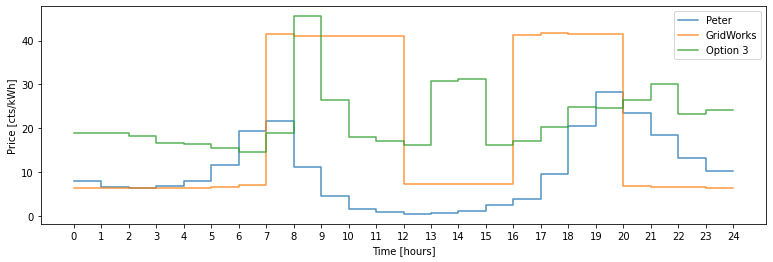

In [7]:
# Plot the different price profiles
gw = get_c_el("gridworks")
prog = get_c_el("progressive")
peter = get_c_el("peter")

gw2 = gw + [gw[-1]]
prog2 = prog + [prog[-1]]
peter2 = peter + [peter[-1]]

fig, ax = plt.subplots(1,1, figsize=(13,4))
ax.step(range(N+1), peter2, where='post', alpha=0.8, label='Peter')
ax.step(range(N+1), gw2, where='post', alpha=0.8, label='GridWorks')
ax.step(range(N+1), prog2, where='post', alpha=0.8, label='Option 3')
ax.set_xticks(range(N+1))
ax.set_xlabel("Time [hours]")
ax.set_ylabel("Price [cts/kWh]")
ax.legend()
plt.show()

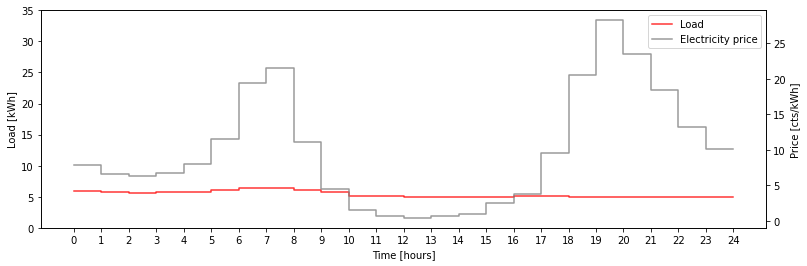

In [8]:
# Duplicate the last element of the hourly data for the plot
c_el2 = c_el + [c_el[-1]]
load2 = load + [load[-1]]

fig, ax = plt.subplots(1,1, figsize=(13,4))
ax2 = ax.twinx()
ax2.step(range(N+1), c_el2, where='post', color='gray', alpha=0.8, label='Electricity price')
ax.step(range(N+1), load2, where='post', color='red', alpha=0.8, label='Load')
ax.set_ylim([0,35])
ax.set_xticks(range(N+1))
ax.set_xlabel("Time [hours]")
ax.set_ylabel("Load [kWh]")
ax2.set_ylabel("Price [cts/kWh]")
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2)
plt.show()

## 3 - Hourly available heating power and prices per kWh_th

In [9]:
# Get the LWT options available at a given T_OA and T_HP_in
def get_LWT_options(T_OA, elec, T_HP_in, PRINT):
        
    # Range (min,max) of acceptable Q_HP for each LWT option at the given T_OA
    LWT_options = [list[0] for list in Q_max_table][1:]

    # Get the corresponding Q_min and Q_max depending on T_OA
    Q_min_by_LWT, Q_max_by_LWT = [], []
    for LWT in LWT_options:
        Q_HP_max, Q_HP_min, _ = get_range_and_COP(LWT, T_OA)
        Q_max_by_LWT.append(Q_HP_max)
        Q_min_by_LWT.append(Q_HP_min)
    
    #Q_max_by_LWT = [Q_max[column][T_OA] for column in Q_max.columns]
    #Q_min_by_LWT = [round(Q_min[column][T_OA]) for column in Q_min.columns]
    
    # Find the LWT(s) that are attainable within this range of Q_HP
    available_LWT = []
    for i in range(len(LWT_options)):
        # The heat needed to attain that LWT
        Q_HP = round(m_HP(LWT_options[i])*4187*(LWT_options[i]-T_HP_in),1)
        # If it can be attained
        if Q_HP <= Q_max_by_LWT[i] and Q_HP >= Q_min_by_LWT[i]:
            if PRINT: print(f"[OK] LWT = {LWT_options[i]}°C, m_HP = {m_HP(LWT_options[i])} kg/s \
            would use Q_HP = {round(Q_HP/1000,1)} kW")
            available_LWT.append(LWT_options[i])
        # If it can not be attained
        else:
            if PRINT: print(f"[--] LWT = {LWT_options[i]}°C, m_HP = {m_HP(LWT_options[i])} kg/s \
            would use Q_HP = {round(Q_HP/1000,1)} kW")
    
    # The corresponding prices and Q_HP ranges
    for LWT in available_LWT:
        Q_HP = m_HP(LWT)*4187*(LWT-T_HP_in)/1000
        Q_max_LWT_TOA, _, COP_LWT_TOA = get_range_and_COP(LWT, T_OA)
        W_HP = Q_HP/COP_LWT_TOA
        
        if PRINT:
            print(f"\n{LWT}°C water is possible:")
            print(f"Requires {round(Q_HP,1)} kW_th => {round(W_HP,1)} kW_elec at {round(W_HP*elec,1)} cts/kWh => [{round(W_HP*elec/Q_HP,2)} cts/kWh_th]")
            print(f"The Q_HP range for this LWT is => [{round(Q_HP,1)}, {round(Q_max_LWT_TOA/1000)}] kW")

    # There is generally only one LWT option. Save the range and cost for the given hour.
    Q_HP_min = round(Q_HP,3)
    Q_HP_max, _, __ = get_range_and_COP(LWT, T_OA)
    Q_HP_max = round(Q_HP_max/1000,3)
    cost_th = round(W_HP*elec/Q_HP,3)
    
    return Q_HP_min, Q_HP_max, cost_th

In [10]:
# For each hour, find the available Q_HP range and price per kWh_th
def get_ranges_and_costs(c_el, T_OA_list, T_HP_in, PRINT):

    if PRINT:
        print("**************************************")
        print(f"Assuming water going to the HP at {T_HP_in}°C")
        print("**************************************")
    
    Q_HP_min_list, Q_HP_max_list, cost_th_list = [], [], []
    for i in range(len(c_el)):

        if PRINT:
            print("\n----------------------------------------")
            print(f"Hour {i+1} ({T_OA_list[i]}°C outside, {round(c_el[i],2)} cts/kWh)")
            print("----------------------------------------\n")
        
        Q_HP_min, Q_HP_max, cost_th = get_LWT_options(T_OA_list[i], c_el[i], T_HP_in, PRINT)
    
        # Append the values in lists
        Q_HP_min_list.append(round(Q_HP_min,1))    
        Q_HP_max_list.append(round(Q_HP_max,1))
        cost_th_list.append(cost_th)

    return Q_HP_min_list, Q_HP_max_list, cost_th_list

Q_HP_min_list, Q_HP_max_list, cost_th_list = get_ranges_and_costs(c_el, T_OA_list, T_HP_in, True)

**************************************
Assuming water going to the HP at 55°C
**************************************

----------------------------------------
Hour 1 (2°C outside, 7.92 cts/kWh)
----------------------------------------

[--] LWT = 30°C, m_HP = 0.57 kg/s             would use Q_HP = -59.7 kW
[--] LWT = 35°C, m_HP = 0.57 kg/s             would use Q_HP = -47.7 kW
[--] LWT = 40°C, m_HP = 0.57 kg/s             would use Q_HP = -35.8 kW
[--] LWT = 45°C, m_HP = 0.57 kg/s             would use Q_HP = -23.9 kW
[--] LWT = 50°C, m_HP = 0.36 kg/s             would use Q_HP = -7.5 kW
[--] LWT = 55°C, m_HP = 0.36 kg/s             would use Q_HP = 0.0 kW
[OK] LWT = 60°C, m_HP = 0.29 kg/s             would use Q_HP = 6.1 kW
[--] LWT = 65°C, m_HP = 0.29 kg/s             would use Q_HP = 12.1 kW

60°C water is possible:
Requires 6.1 kW_th => 2.4 kW_elec at 18.8 cts/kWh => [3.1 cts/kWh_th]
The Q_HP range for this LWT is => [6.1, 8] kW

----------------------------------------
Hour 2 (2°C

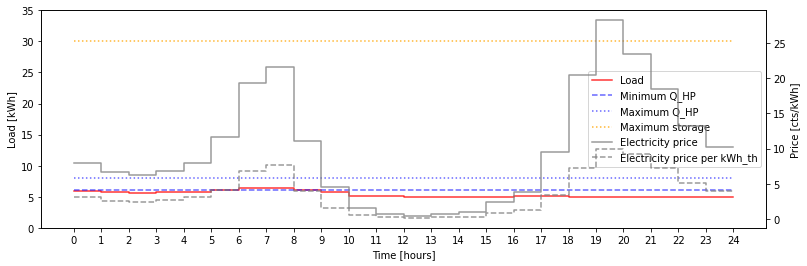

In [11]:
# Duplicate the last element of the hourly data for the plot
c_el2 = c_el + [c_el[-1]]
load2 = load + [load[-1]]
Q_min2 = Q_HP_min_list + [Q_HP_min_list[-1]]
Q_max2 = Q_HP_max_list + [Q_HP_max_list[-1]]
cost_th_list2 = cost_th_list + [cost_th_list[-1]]

fig, ax = plt.subplots(1,1, figsize=(13,4))
ax2 = ax.twinx()
ax2.step(range(N+1), c_el2, where='post', color='gray', alpha=0.8, label='Electricity price')
ax2.step(range(N+1), cost_th_list2, where='post', color='gray', alpha=0.8, label='Electricity price per kWh_th', linestyle='dashed')
ax.step(range(N+1), load2, where='post', color='red', alpha=0.8, label='Load')
ax.step(range(N+1), Q_min2, where='post', color='blue', alpha=0.6, label='Minimum Q_HP', linestyle='dashed')
ax.step(range(N+1), Q_max2, where='post', color='blue', alpha=0.6, label='Maximum Q_HP', linestyle='dotted')
ax.step(range(N+1), [max_storage]*(N+1), where='post', color='orange', alpha=0.8, label='Maximum storage', linestyle='dotted')
ax.set_ylim([0,35])
ax.set_xticks(range(N+1))
ax.set_xlabel("Time [hours]")
ax.set_ylabel("Load [kWh]")
ax2.set_ylabel("Price [cts/kWh]")
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2)
plt.show()

## 4 - Original (old) Pareto algorithm

In [12]:
def get_pareto_original(cost_th_list, load, max_storage, PRINT):

    # Treat for duplicates
    for i in range(N):
        for j in range(N):
            if i!=j and cost_th_list[i] == cost_th_list[j]:
                cost_th_list[j] = cost_th_list[j] + random.uniform(-0.5, 0.5)
    
    # Ranking the hourly costs ($/kWh_th)
    ranking = [sorted(cost_th_list).index(x) for x in cost_th_list]
    if PRINT: print(f"Ranking hours by $/kWh_th:\n{ranking}\n")
    
    # Initialize
    storage = [0 for i in range(N+1)]
    Q_HP = [0 for i in range(N)]
    problem_solved = False
    ok = [1]*N
    last_not_ok = N-2
    testing = [round(x,4) for x in storage]
    
    #------------------------------------------------------
    # Starting at the first not ok hour
    # Turn on the HP before or during that hour
    # From the lowest to the highest price hour
    # Until that hour is ok
    # Move to next not ok hour and repeat
    #------------------------------------------------------

    while sum(ok) != 0:
        
        first_not_ok = ok.index(1)
        
        if PRINT:
            print("---------------------------------------")
            print(f"The first unsatisfied hour: {first_not_ok}:00")
            print("---------------------------------------")
    
        # For all hours by ranking
        for i in range(N):
        
            # Skip all hours after the first unsatisfied hour
            if ranking.index(i) > first_not_ok: continue

            # Skip all hours that are already turned on
            if Q_HP[ranking.index(i)] != 0: continue
    
            if PRINT: 
                print(f"{ranking.index(i)}:00, is the cheapest remaining hour before {first_not_ok}:00")
    
            #------------------------------------------------------
            # Use the max Q_HP you can in the cheapest remaining hour
            #------------------------------------------------------

            # Try the maximum Q_HP
            Q_HP[ranking.index(i)] = Q_HP_max_list[ranking.index(i)]
            
            # Check if this violates the max storage constraint
            total_violation = 0
            testing = [round(x,4) for x in storage]
            for j in range(N):
                if Q_HP[j]-load[j]+testing[j] >= 0:
                    testing[j+1] = Q_HP[j]-load[j]+testing[j]
                    if testing[j+1] > max_storage:
                        total_violation += testing[j+1]-max_storage
        
            # Max storage is not violated: use max power
            if total_violation == 0:
                if PRINT: print(f"The maximum Q_HP can be used at this time.\n")
                for j in range(N):
                    if Q_HP[j]-load[j]+storage[j] >= 0:
                        storage[j+1] = Q_HP[j]-load[j]+storage[j]
                        ok[j] = 0
        
            # Max storage is violated: use exact power or turn off
            else:
                if PRINT: print(f"Need to use {round(total_violation,1)} less kW than the maximum.")
                
                # See if you can reduce the Q_HP at that time
                if Q_HP_max_list[ranking.index(i)] - total_violation > Q_HP_min_list[ranking.index(i)]:
                    if PRINT: print(f"Feasible, reduced the HP power.\n")
                    Q_HP[ranking.index(i)] = Q_HP_max_list[ranking.index(i)] - total_violation
                    for j in range(N):
                        if Q_HP[j]-load[j]+storage[j] >= 0:
                            storage[j+1] = Q_HP[j]-load[j]+storage[j]
                            ok[j] = 0
                # If not, turn off the HP at that time
                else:
                    if PRINT: print(f"Infeasible, turned off the HP at this time.\n")
                    Q_HP[ranking.index(i)] = 0
                    for j in range(N):
                        if Q_HP[j]-load[j]+storage[j] >= 0:
                            storage[j+1] = Q_HP[j]-load[j]+storage[j]
                            ok[j] = 0

            #------------------------------------------------------
            # Plot the current iteration
            #------------------------------------------------------

            if PRINT and sum(ok) > 0 and ok.index(1) != first_not_ok:
    
                # Duplicate the last element of the hourly data for the plot
                cost_th_list2 = cost_th_list + [cost_th_list[-1]]
                Q_HP2 = [round(x,3) for x in Q_HP + [Q_HP[-1]]]
                load2 = load + [load[-1]]
    
                # Plot the current state of the system
                fig, ax = plt.subplots(1,1, figsize=(13,4))
                ax2 = ax.twinx()
                ax2.step(range(N+1), cost_th_list2, where='post', color='gray', alpha=0.6, label='Cost per kWh_th')
                ax.step(range(N+1), load2, where='post', color='red', alpha=0.4, label='Load')
                ax.step(range(N+1), Q_HP2, where='post', color='blue', alpha=0.5, label='HP')
                ax.plot(storage, color='orange', alpha=0.6, label='Storage')
                ax.set_ylim([0,35])
                ax.set_xticks(range(N+1))
                ax.set_xlabel("Time [hours]")
                ax.set_ylabel("Heat [kWh_th]")
                ax2.set_ylabel("Price [cts/kWh_th]")
                lines1, labels1 = ax.get_legend_handles_labels()
                lines2, labels2 = ax2.get_legend_handles_labels()
                ax.legend(lines1 + lines2, labels1 + labels2)
                plt.show()
            
            # If the first_not_ok hour is satisfied, break
            if sum(ok) > 0:
                if ok.index(1) != first_not_ok:
                    if PRINT: print(f"Success! Everything until {ok.index(1)}:00 is satisfied.\n")
                    break

            # If the problem is solved, break
            if sum(ok) == 0:
                problem_solved = True
                if PRINT: print("Problem solved!\n")
                break
    
    # Calculate the total cost and energy
    total_cost = 0
    for i in range(N):
        total_cost += Q_HP[i]*cost_th_list[i]
    total_cost = round(total_cost/100,2)
    total_energy = round(sum(Q_HP),1)

    return Q_HP, storage, ok, total_cost, total_energy

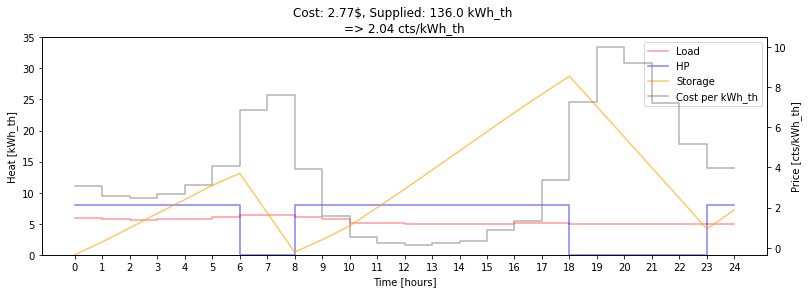

In [13]:
# Get the solution from the pareto algorithm
Q_HP, storage, ok, total_cost, total_energy = get_pareto_original(cost_th_list, load, max_storage, False)

# Duplicate the last element of the hourly data for the plot
cost_th_list2 = cost_th_list + [cost_th_list[-1]]
Q_HP = [round(x,3) for x in Q_HP + [Q_HP[-1]]]
load2 = load + [load[-1]]

# Plot the state of the system
fig, ax = plt.subplots(1,1, figsize=(13,4))
plt.title(f"Cost: {total_cost}$, Supplied: {total_energy} kWh_th \n=> {round(100*total_cost/total_energy,2)} cts/kWh_th")
ax2 = ax.twinx()
ax2.step(range(N+1), cost_th_list2, where='post', color='gray', alpha=0.6, label='Cost per kWh_th')
ax.step(range(N+1), load2, where='post', color='red', alpha=0.4, label='Load')
ax.step(range(N+1), Q_HP, where='post', color='blue', alpha=0.5, label='HP')
ax.plot(storage, color='orange', alpha=0.6, label='Storage')
ax.set_ylim([0,35])
ax.set_xticks(range(N+1))
ax.set_xlabel("Time [hours]")
ax.set_ylabel("Heat [kWh_th]")
ax2.set_ylabel("Price [cts/kWh_th]")
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2)

start_idx = None
for i, value in enumerate(ok):
    if value == 1 and start_idx is None:
        start_idx = i
    elif value == 0 and start_idx is not None:
        ax.axvspan(start_idx, i, facecolor='red', alpha=0.1)
        start_idx = None

plt.show()

## 4.2 - Improved Pareto

In [14]:
def get_pareto(cost_th_list, load, max_storage, PRINT):

    # Treat for duplicates
    for i in range(N):
        for j in range(N):
            if i!=j and cost_th_list[i] == cost_th_list[j]:
                cost_th_list[j] = cost_th_list[j] + random.uniform(-0.5, 0.5)
    
    # Ranking the hourly costs ($/kWh_th)
    ranking = [sorted(cost_th_list).index(x) for x in cost_th_list]
    if PRINT: print(f"Ranking hours by $/kWh_th:\n{ranking}\n")
    
    # Initialize
    storage = [0 for i in range(N+1)]
    Q_HP = [0 for i in range(N)]
    problem_solved = False
    ok = [1]*N
    last_not_ok = N-2
    testing = storage.copy()
    Q_HP_discovered_max = Q_HP_max_list.copy()
    
    #------------------------------------------------------
    # Starting at the first not ok hour
    # Turn on the HP before or during that hour
    # From the lowest to the highest price hour
    # Until that hour is ok
    # Move to next not ok hour and repeat
    #------------------------------------------------------

    while sum(ok) != 0:
        
        first_not_ok = ok.index(1)

        # Backups
        storage_backup = storage.copy()
        Q_HP_backup = Q_HP.copy()
        ok_backup = ok.copy()
        
        if PRINT:
            print("----------------------------------------------------")
            print(f"Next hour in which the load is not satisfied: t={first_not_ok}")
            print("----------------------------------------------------\n")
    
        # For all hours by ranking
        for i in range(N):
        
            # Skip all hours after the first unsatisfied hour
            if ranking.index(i) > first_not_ok: continue

            # Skip all hours that are already turned on to the max
            #if Q_HP[ranking.index(i)] != 0: continue
            if Q_HP[ranking.index(i)] == Q_HP_max_list[ranking.index(i)]: continue
            # Skip all hours that are already turned to their discovered max (storage limit)
            if Q_HP[ranking.index(i)] == Q_HP_discovered_max[ranking.index(i)]: continue
    
            if PRINT: 
                print(f"The cheapest remaining hour before t is t_c={ranking.index(i)}")
            
            #------------------------------------------------------
            # Use the max Q_HP you can in the cheapest remaining hour
            #------------------------------------------------------

            # Try the maximum Q_HP
            Q_HP[ranking.index(i)] = Q_HP_max_list[ranking.index(i)]
            
            # Check if this violates the max storage constraint
            total_violation = 0
            testing = storage.copy()
            for j in range(N):
                if Q_HP[j]-load[j]+testing[j] >= 0:
                    testing[j+1] = Q_HP[j]-load[j]+testing[j]
                    if testing[j+1] > max_storage:
                        total_violation += testing[j+1]-max_storage
            total_violation = round(total_violation,1)
        
            # Max storage is not violated: use max power
            if total_violation == 0:
                if PRINT: print(f"The maximum Q_HP(t_c)={Q_HP_max_list[ranking.index(i)]}kWh can be used without exceeding the storage.\n")
                for j in range(N):
                    if Q_HP[j]-load[j]+storage[j] >= 0:
                        storage[j+1] = Q_HP[j]-load[j]+storage[j]
                        ok[j] = 0
        
            # Max storage is violated: use exact power or turn off
            else:
                if PRINT: 
                    print(f"The maximum Q_HP(t_c) can not be used without exceeding the storage by {total_violation}kWh.")
                    #print(f"Need to use at least {total_violation}kWh less.")
                
                # See if you can reduce the Q_HP at that time
                # Only if Q_HP is currently 0
                if Q_HP_max_list[ranking.index(i)] - total_violation > Q_HP_min_list[ranking.index(i)]\
                and Q_HP_backup[ranking.index(i)]==0:
                    if PRINT: print(f"Heating reduced to Q_HP(t_c)={Q_HP_max_list[ranking.index(i)] - total_violation}kWh.\n")
                    Q_HP[ranking.index(i)] = Q_HP_max_list[ranking.index(i)] - total_violation
                    Q_HP_discovered_max[ranking.index(i)] = Q_HP_max_list[ranking.index(i)] - total_violation
                    for j in range(N):
                        if Q_HP[j]-load[j]+storage[j] >= 0:
                            storage[j+1] = Q_HP[j]-load[j]+storage[j]
                            ok[j] = 0
                # If not, turn off the HP at that time
                else:
                    if PRINT: print(f"Heating could not be reduced, keep Q_HP(t_c)={Q_HP_backup[ranking.index(i)]}kWh, as it was before this iteration.\n")
                    Q_HP[ranking.index(i)] = Q_HP_backup[ranking.index(i)]
                    Q_HP_discovered_max[ranking.index(i)] = Q_HP_backup[ranking.index(i)]
                    for j in range(N):
                        if Q_HP[j]-load[j]+storage[j] >= 0:
                            storage[j+1] = Q_HP[j]-load[j]+storage[j]
                            ok[j] = 0

            #------------------------------------------------------
            # Tried to go as far as possible
            # Were there cheaper prices between the current hour and how far we went?
            # If so, try to reach these cheaper prices
            #------------------------------------------------------

            if sum(ok) > 0 and ok.index(1) != first_not_ok:

                # first_minimum available
                for price in cost_th_list[first_not_ok:ok.index(1)+1]:
                    if price < cost_th_list[ranking.index(i)]:
                        minimum_available = price
                        hour_min_available = first_not_ok + cost_th_list[first_not_ok:ok.index(1)+1].index(price)
                        break
                
                #minimum_available = np.min(cost_th_list[first_not_ok:ok.index(1)+1])
                #hour_min_available = first_not_ok + cost_th_list[first_not_ok:ok.index(1)+1].index(minimum_available)
                current_price = cost_th_list[ranking.index(i)]

                # A cheaper hour than now is attained
                if minimum_available < cost_th_list[ranking.index(i)]:
                    
                    # Try to use a lower Q_HP to reach that point
                    if Q_HP[ranking.index(i)] > Q_HP_min_list[ranking.index(i)]\
                    and Q_HP[hour_min_available] < Q_HP_max_list[hour_min_available] :
                        
                        if PRINT: 
                            print(f"In this case, every hour could be satisfied up to t'={ok.index(1)}")
                            #print(f"Everything was ok until {first_not_ok}, now until {ok.index(1)}") 
                            print(f"A cheaper hour than t_c was reached at hour {hour_min_available}, which is between t and t'.")
                            #print(f"A cheaper price (now: {cost_th_list[ranking.index(i)]}) was reached at hour {hour_min_available}: {minimum_available}.")
                            #print(f"A lower Q_HP was possible!") 
                            #print(f"Currently Q_HP={Q_HP_backup[ranking.index(i)]}")
                            
                        # Find the right Q_HP to use
                        q_mini = int(Q_HP_min_list[ranking.index(i)] * 10) if int(Q_HP_backup[ranking.index(i)])==0 else int(Q_HP[ranking.index(i)]*10)
                        q_maxi = int(Q_HP_discovered_max[ranking.index(i)] * 10)
                        min_so_far = storage[hour_min_available]
                        best_q = Q_HP[ranking.index(i)]

                        # Find the minimum Q_HP in that range that satisfied storage[min hour] > 0
                        #if PRINT: print(f"Looking into range: ({q_mini},{q_maxi})")
                        for fake_q in range(q_mini, q_maxi+1):
                            
                            real_q = fake_q/10
                            
                            test_storage = storage_backup.copy()
                            test_Q_HP = Q_HP_backup.copy()
                            test_ok = ok_backup.copy()

                            test_Q_HP[ranking.index(i)] = real_q
                            
                            for j in range(N):
                                if test_Q_HP[j]-load[j]+test_storage[j] >= 0:
                                    test_storage[j+1] = test_Q_HP[j]-load[j]+test_storage[j]
                                    test_ok[j] = 0

                            # Just before the min hour need to be ok
                            if hour_min_available>0 and test_ok[hour_min_available-1] == 0:
                                # Check the storage at min hour
                                if test_storage[hour_min_available] < min_so_far:
                                    min_so_far = test_storage[hour_min_available]
                                    best_q = real_q

                        # Implement it
                        if PRINT: print(f"Reduced to Q_HP(t_c)={best_q}kWh to reach hour {hour_min_available} with the least possible heating.")
                        storage = storage_backup.copy()
                        Q_HP = Q_HP_backup.copy()
                        ok = ok_backup.copy()

                        Q_HP[ranking.index(i)] = best_q
                        for j in range(N):
                            if Q_HP[j]-load[j]+storage[j] >= 0:
                                storage[j+1] = Q_HP[j]-load[j]+storage[j]
                                ok[j] = 0
                        if PRINT: print("")

                    else:
                        if PRINT: print("Reducing Q_HP(t_c) to reach a cheaper hour was not possible at this iteration.\n")

                else:
                    if PRINT: print("Reducing Q_HP(t_c) to reach a cheaper hour was not possible at this iteration.\n")

            #------------------------------------------------------
            # Plot the current iteration
            #------------------------------------------------------

            if PRINT and sum(ok) > 0 and ok.index(1) != first_not_ok:
    
                # Duplicate the last element of the hourly data for the plot
                cost_th_list2 = cost_th_list + [cost_th_list[-1]]
                Q_HP2 = [round(x,3) for x in Q_HP + [Q_HP[-1]]]
                load2 = load + [load[-1]]
    
                # Plot the current state of the system
                fig, ax = plt.subplots(1,1, figsize=(13,4))
                ax2 = ax.twinx()
                ax2.step(range(N+1), cost_th_list2, where='post', color='gray', alpha=0.6, label='Cost per kWh_th')
                ax.step(range(N+1), load2, where='post', color='red', alpha=0.4, label='Load')
                ax.step(range(N+1), Q_HP2, where='post', color='blue', alpha=0.5, label='HP')
                ax.plot(range(N+1), [max_storage]*(N+1), alpha=0.2, linestyle='dotted', color='gray')
                ax.plot(storage, color='orange', alpha=0.6, label='Storage')
                ax.set_ylim([0,35])
                ax.set_xticks(range(N+1))
                ax.set_xlabel("Time [hours]")
                ax.set_ylabel("Heat [kWh_th]")
                ax2.set_ylabel("Price [cts/kWh_th]")
                lines1, labels1 = ax.get_legend_handles_labels()
                lines2, labels2 = ax2.get_legend_handles_labels()
                ax.legend(lines1 + lines2, labels1 + labels2)
                plt.show()

            #------------------------------------------------------
            # Check up to when it is ok
            #------------------------------------------------------
            
            # If the first_not_ok hour is satisfied, break
            if sum(ok) > 0:
                if ok.index(1) != first_not_ok:
                    #if PRINT: print(f"Success! Everything until {ok.index(1)}:00 is satisfied.\n")
                    break

            # If the problem is solved, break
            if sum(ok) == 0:
                problem_solved = True
                if PRINT: print("Problem solved!\n")
                break

    #------------------------------------------------------
    # Calculate the total cost and energy
    #------------------------------------------------------
    
    total_cost = 0
    for i in range(N):
        total_cost += Q_HP[i]*cost_th_list[i]
    total_cost = round(total_cost/100,2)
    total_energy = round(sum(Q_HP),1)

    #------------------------------------------------------
    # Run a check
    #------------------------------------------------------
    for j in range(N):
        if Q_HP[j] < 0:
            print("MAYDAY")
            raise ValueError("MAYDAY")
        if Q_HP[j] != 0 and (Q_HP[j]<Q_HP_min_list[j] or Q_HP[j]>Q_HP_max_list[j]):
            print("MAYDAY")
            raise ValueError("MAYDAY")
        if Q_HP[j]-load[j]+storage[j] < 0:
            print("MAYDAY")
            raise ValueError("MAYDAY")
        if storage[j] > max_storage+0.05:
            print(f"Failed at {j}: {storage[j]}")
            print("MAYDAY")
            raise ValueError("MAYDAY")

    return Q_HP, storage, ok, total_cost, total_energy

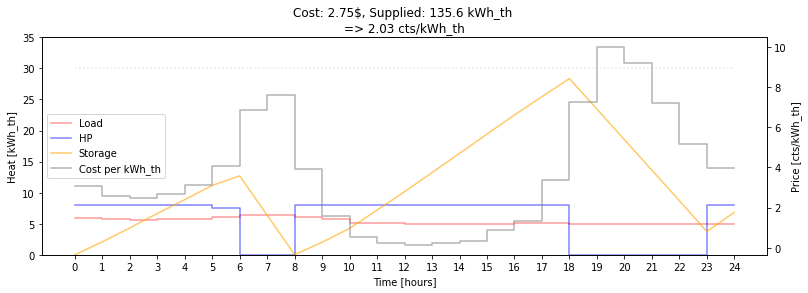

In [15]:
# Get the solution from the pareto algorithm
Q_HP, storage, ok, total_cost, total_energy = get_pareto(cost_th_list, load, max_storage, False)

# Duplicate the last element of the hourly data for the plot
cost_th_list2 = cost_th_list + [cost_th_list[-1]]
Q_HP = [round(x,3) for x in Q_HP + [Q_HP[-1]]]
load2 = load + [load[-1]]

# Plot the state of the system
fig, ax = plt.subplots(1,1, figsize=(13,4))
plt.title(f"Cost: {total_cost}$, Supplied: {total_energy} kWh_th \n=> {round(100*total_cost/total_energy,2)} cts/kWh_th")
ax2 = ax.twinx()
ax2.step(range(N+1), cost_th_list2, where='post', color='gray', alpha=0.6, label='Cost per kWh_th')
ax.step(range(N+1), load2, where='post', color='red', alpha=0.4, label='Load')
ax.step(range(N+1), Q_HP, where='post', color='blue', alpha=0.5, label='HP')
ax.plot(storage, color='orange', alpha=0.6, label='Storage')
ax.plot(range(N+1), [max_storage]*(N+1), alpha=0.2, linestyle='dotted', color='gray')
ax.set_ylim([0,35])
ax.set_xticks(range(N+1))
ax.set_xlabel("Time [hours]")
ax.set_ylabel("Heat [kWh_th]")
ax2.set_ylabel("Price [cts/kWh_th]")
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2)

start_idx = None
for i, value in enumerate(ok):
    if value == 1 and start_idx is None:
        start_idx = i
    elif value == 0 and start_idx is not None:
        ax.axvspan(start_idx, i, facecolor='red', alpha=0.1)
        start_idx = None

plt.show()

## 5 - Optimization algorithm

In [16]:
def get_opti(cost_th_list, load, max_storage, storage_final):

    opti = casadi.Opti('conic')

    # Normal values (when not comparing with Pareto)
    # max_storage = 12
    # storage_final = 5
        
    # Variables
    Q_HP = opti.variable(1,N) # input
    storage = opti.variable(1,N+1) # state
    HP_on_off = opti.variable(1,N) # input
    Q_HP_onoff = opti.variable(1,N) # input (derived)
    
    # HP_on_off is a discrete variable (binary)
    discrete_var = [0]*N + [0]*(N+1) + [1]*N + [0]*N
    
    # Solver
    opti.solver('gurobi', {'discrete':discrete_var, 'gurobi.OutputFlag':0})
    
    # Constraints on storage (state)
    for t in range(N+1):
    
        # Initial and final storage
        opti.subject_to(storage[0] == 0)
        opti.subject_to(storage[N] == storage_final)
        
        # Minimum and maximum storage
        opti.subject_to(storage[t] >= 0)
        opti.subject_to(storage[t] <= max_storage)
        
        # System dynamics
        if t < N: opti.subject_to(storage[t+1] == Q_HP_onoff[t] - load[t] + storage[t])
    
    # Constraints on Q_HP and HP_on_off (inputs)
    for t in range(N):
    
        # Delta is binary
        opti.subject_to(HP_on_off[t] >= 0)
        opti.subject_to(HP_on_off[t] <= 1)
    
        # Q_HP is in a range
        opti.subject_to(Q_HP[t] <= Q_HP_max_list[t])    
        opti.subject_to(Q_HP[t] >= Q_HP_min_list[t]*HP_on_off[t])
    
        # Bilinear to linear
        opti.subject_to(Q_HP_onoff[t] <= Q_HP_max_list[t]*HP_on_off[t])
        opti.subject_to(Q_HP_onoff[t] >= Q_HP_min_list[t]*HP_on_off[t])
        opti.subject_to(Q_HP_onoff[t] <= Q_HP[t] + Q_HP_min_list[t]*(HP_on_off[t]-1))
        opti.subject_to(Q_HP_onoff[t] >= Q_HP[t] + Q_HP_max_list[t]*(HP_on_off[t]-1))
    
    # Objective
    obj = sum(Q_HP_onoff[t]*cost_th_list[t] for t in range(N))
    opti.minimize(obj)
    
    # Solve and get optimal values
    sol = opti.solve()
    Q_opt = sol.value(Q_HP_onoff)
    stor_opt = sol.value(storage)
    HP_on_off_opt = sol.value(HP_on_off)
    obj_opt = round(sol.value(obj)/100,2)

    return Q_opt, stor_opt, HP_on_off_opt, obj_opt

Academic license - for non-commercial use only
Academic license - for non-commercial use only


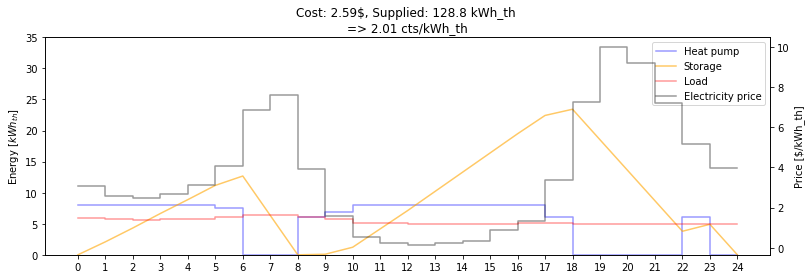

In [17]:
# Get the solution from the optimization problem
Q_opt, stor_opt, HP_on_off_opt, obj_opt = get_opti(cost_th_list, load, max_storage, 0)

# Duplicate the last element of the hourly data for the plot
cost_th_list2 = cost_th_list + [cost_th_list[-1]]
Q_opt = [round(x,3) for x in Q_opt] + [Q_opt[-1]]
load2 = load + [load[-1]]

# Plot
fig, ax = plt.subplots(1,1, figsize=(13,4))
ax.step(range(N+1), Q_opt, where='post', label='Heat pump', alpha=0.4, color='blue')
ax.plot(range(N+1), stor_opt, label='Storage', alpha=0.6, color='orange')
ax.step(range(N+1), load2, where='post', label='Load', alpha=0.4, color='red')
ax.set_xticks(range(N+1))
ax.set_ylabel("Energy [$kWh_{th}$]")
plt.title(f"Cost: {obj_opt}$, Supplied: {round(sum(load),1)} kWh_th \n=> {round(100*obj_opt/sum(load),2)} cts/kWh_th")
ax2 = ax.twinx()
ax.set_ylim([0,35])
ax2.set_ylabel("Price [$/kWh_th]")
ax2.step(range(N+1), cost_th_list2, where='post', label='Electricity price', color='black', alpha = 0.4)
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2)
plt.show()

## 6 - Comparison

In [18]:
def comparison(max_storage, PRINT, PLOT):

    # Get pareto improved
    Q_HP, storage, ok, total_cost, total_energy = get_pareto(cost_th_list, load, max_storage, PRINT)
    total_cost = round(100 * total_cost / total_energy,2)
    
    # Get optimal (with the same final storage)
    Q_opt, stor_opt, HP_on_off_opt, obj_opt = get_opti(cost_th_list, load, max_storage, storage[-1])
    obj_opt = round(100 * obj_opt / total_energy,2)

    # Get pareto original
    Q_HP_ori, storage_ori, ok_ori, total_cost_ori, total_energy_ori = get_pareto_original(cost_th_list, load, max_storage, PRINT)
    total_cost_ori = round(100 * total_cost_ori / total_energy_ori,2)

    # Get no load shifting
    worst_cost = 0
    for i in range(N):
        worst_cost += cost_th_list[i] * load[i]
    worst_cost = round(worst_cost/sum(load),2)
    
    # Duplicate the last element of the hourly data for the plot
    cost_th_list2 = cost_th_list + [cost_th_list[-1]]
    load2 = load + [load[-1]]
    Q_opt = [round(x,3) for x in Q_opt] + [Q_opt[-1]]
    Q_HP = [round(x,3) for x in Q_HP + [Q_HP[-1]]]
    
    # Plot the differeence
    if PLOT:
        fig, ax = plt.subplots(1,1, figsize=(13,4))
        ax.step(range(N+1), Q_opt, where='post', label='Heat pump - optimal', alpha=0.4, color='blue', linestyle='dashed')
        ax.step(range(N+1), Q_HP, where='post', label='Heat pump - pareto', alpha=0.4, color='blue')
        ax.plot(range(N+1), stor_opt, label='Storage - optimal', alpha=0.6, color='orange', linestyle='dashed')
        ax.plot(range(N+1), storage, label='Storage - pareto', alpha=0.6, color='orange')
        ax.step(range(N+1), load2, where='post', label='Load', alpha=0.2, color='red')
        ax.plot(range(N+1), [max_storage]*(N+1), alpha=0.2, linestyle='dotted', color='gray')
        ax.set_xticks(range(N+1))
        ax.set_ylabel("Energy [$kWh_{th}$]")
        plt.legend()
        ax2 = ax.twinx()
        ax.set_ylim([0,35])
        ax2.set_ylabel("Price [$/kWh_th]")
        ax2.step(range(N+1), cost_th_list2, where='post', label='Electricity price', color='black', alpha = 0.2)
        plt.title(f"Optimal: {obj_opt} cts/kWh_th\n Pareto: {total_cost} cts/kWh_th\n No load shifting: {worst_cost} cts/kWh_th")
    
        start_idx = None
        for i, value in enumerate(ok):
            if value == 1 and start_idx is None:
                start_idx = i
            elif value == 0 and start_idx is not None:
                ax.axvspan(start_idx, i, facecolor='red', alpha=0.1)
                print(f"Pareto failed to provide load from {start_idx}:00 to {i}:00")
                start_idx = None
        
        plt.show()

    # Return the prices
    return obj_opt, total_cost, total_cost_ori, worst_cost

#### 30 kWh storage

Academic license - for non-commercial use only
Academic license - for non-commercial use only


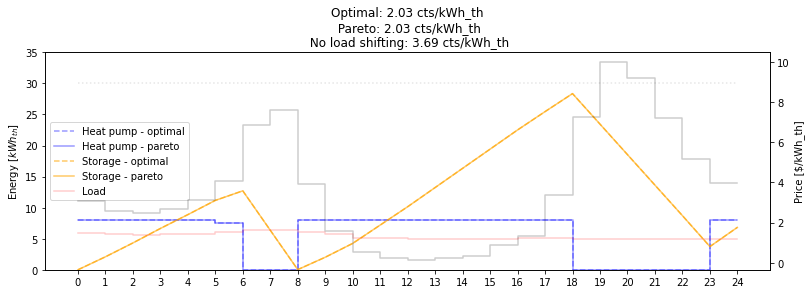

In [19]:
price_opti, price_pareto, price_pareto_ori, price_noshift = comparison(max_storage=30, PRINT=False, PLOT=True)

#### 20 kWh storage

Academic license - for non-commercial use only
Academic license - for non-commercial use only


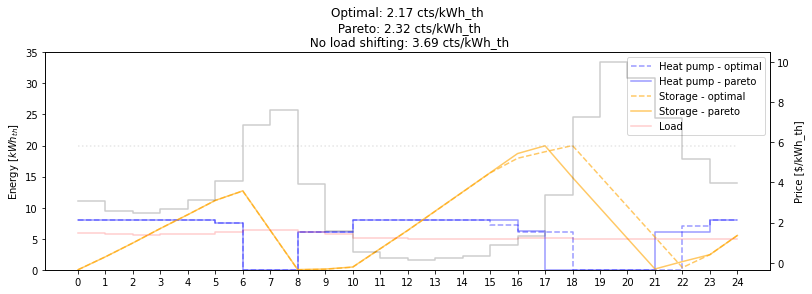

In [20]:
price_opti, price_pareto, price_pareto_ori, price_noshift = comparison(max_storage=20, PRINT=False, PLOT=True)

#### 12 kWh storage

In [21]:
#price_opti, price_pareto, price_pareto_ori, price_noshift = comparison(max_storage=12, PRINT=False, PLOT=True)

#### Comparison results

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic lice

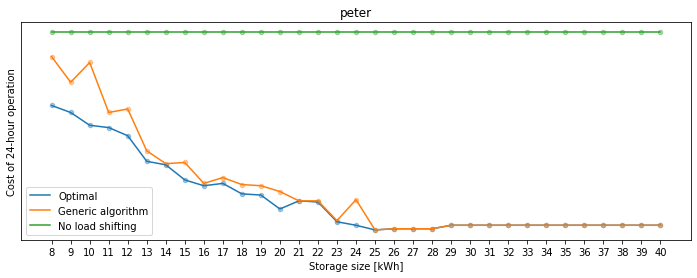

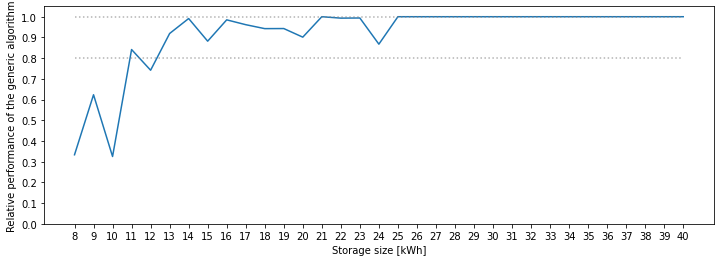

In [28]:
storage_size = list(range(8,41))

optimals = []
paretos = []
paretos_ori = []
no_shifts = []

for max_stor in storage_size:
    price_opti, price_pareto, price_pareto_ori, price_noshift = comparison(max_stor, False, False)
    optimals.append(price_opti)
    paretos.append(price_pareto)
    paretos_ori.append(price_pareto_ori)
    no_shifts.append(price_noshift)

scaled = [1-(paretos[i]-optimals[i])/(no_shifts[i]-optimals[i]) for i in range(len(paretos))]

title_fig = price_type

plt.figure(figsize=(12,4))
plt.title(title_fig)
plt.xlabel("Storage size [kWh]")
plt.ylabel("Cost of 24-hour operation")
plt.plot(storage_size, optimals, label='Optimal')
plt.scatter(storage_size, optimals, alpha=0.4, s=20)
plt.plot(storage_size, paretos, label='Generic algorithm')
plt.scatter(storage_size, paretos, alpha=0.4, s=20)
#plt.plot(storage_size, paretos_ori, label='Pareto original')
#plt.scatter(storage_size, paretos_ori, alpha=0.4, s=20)
plt.plot(storage_size, no_shifts, label='No load shifting')
plt.scatter(storage_size, no_shifts, alpha=0.4, s=20)
plt.xticks(storage_size)
plt.yticks([])
plt.legend()#(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('pareto_performance.jpg', dpi=300)
plt.show()

#print(optimals)

plt.figure(figsize=(12,4))
plt.plot(storage_size, scaled)
plt.xticks(storage_size)
plt.xlabel("Storage size [kWh]")
plt.ylabel("Relative performance of the generic algorithm")
plt.ylim([0,1.05])
plt.plot(storage_size, [1]*len(scaled), linestyle='dotted', alpha=0.6, color='gray')
plt.plot(storage_size, [0.8]*len(scaled), linestyle='dotted', alpha=0.6, color='gray')
plt.yticks([x/10 for x in range(0,11)])

plt.savefig('pareto_performance2.jpg', dpi=300)
plt.show()